# Data Preprocessing Fundamentals

### Author: Rhondene Wint (PhD Student- UC Merced rwint@ucmerced.edu)

### Objective- You are going to learn how to 
1. To find and ways of handing missing data  and outliers (simple data exploration and cleanup)
2. To visualise data such as plotting 5-summary statistics and distribution of your data
2. To combine data from different files (data integration) 
2. To transform data 
3. Perform dimensionality reduction- Principal Component Analysis (PCA) 

### Overview:

We are going to perform data preprocessing and some data exploration on flow cytometry dataset representing the intensities of fluorescent labelled antibodies on blood cell markers obtain from <a href ='https://www.cs.cornell.edu/~arb/data/flow-cytometry/index.html'> here </a>. However, I have modified the data for the purposes of this demonstration.   
<b> Scenario </b>:     
You are going on a dinner date later, which is an accomplised feat while in grad school, so you decided to split your sample and perform the experiment in 2 batches thus you have two data files -'flowcyt_exp_1.csv ' and 'flowcyt_exp_2.csv'. You would like see if you can identity the different populations of blood cells based on the variations in fluorescent intensities using state-of-the-art data science tools in Python programming language. 

#### <i> Advice: If you are still new to programming and data analysis in Python I find the best method for learning is to type the code for myself. You can copy and paste this code or re-run the notebook, but typing it over helps more, albeit it is painstaking. No Pain No Gain :-/</i>

In [1]:
## import these packages which will do bulk of work for us
import pandas as pd  #work with data in tables
import matplotlib.pyplot as plt   #plot graphs
import seaborn  #visualization 
import numpy as np  #numeric computation 

# Step 1. Load and View Your data 

Your data is stored in a file somewhere so we need to load it into python as a <i> dataframe</i> which is simply a table. Tables are preferred format for working  with data when modelling. We will load the data from a .csv file into a dataframe using <i><b> pandas </b> </i> which we have shortened to 'pd'. 

<p> Pandas is one of the most widely used libraries for working with data in tables - and like most libraries in python it is straightfoward to use.  </p> 

In [2]:
##load the two experiment data into a pandas dataframe or table
exp_1 = pd.read_table('flowcyt_exp_1.csv', sep=',')
exp_2 = pd.read_table('flowcyt_exp_2.csv', sep=',')

#### Get an idea about the structure of your data with <i> .head(), .info()</i>, <i>.shape</i>, and <i>.describe()</i>
<b>.info()</b> is a useful method for quickly gaining insight about your data. This is probably the first thing you do after loading your data into a dataframe.  

In [3]:
exp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
FITC-CD4    1500 non-null float64
PE-CD8      1498 non-null float64
ECD-CD19    1500 non-null float64
PC5-CD45    1499 non-null float64
PC7-CD3     1500 non-null float64
dtypes: float64(5)
memory usage: 58.7 KB


In [4]:
exp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    2000 non-null float64
PE-CD8      2000 non-null float64
ECD-CD19    2000 non-null float64
PC5-CD45    2000 non-null float64
PC7-CD3     2000 non-null float64
dtypes: float64(5)
memory usage: 78.2 KB


In [6]:
#calling shape also gives the diminensions of the data (rows vs columns)
print(exp_1.shape)
print(exp_2.shape)

(1500, 5)
(2000, 5)


In [9]:
##view each the first 5 instances of the table
exp_1.head(5)

,FITC-CD4,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,6.319052,10.247240,5.823141,348.236416,32.775910
1,17.596262,12.079250,6.377226,161.834871,105.072122
2,8.035667,7.312782,4.571919,143.615860,15.172019
3,2.288821,19.927998,9.303102,231.140357,95.825287
4,0.346184,1.513483,0.964166,53.802542,4.992490


In [10]:
##view each the first 5 instances of the table
exp_2.head(5)

,FITC-CD4,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,0.837327,1.183511,0.845910,57.769830,5.396848
1,1.323701,2.126696,1.357080,40.802041,5.512243
2,3.643993,3.363613,3.243449,67.657535,10.886203
3,1.740457,2.077105,1.709940,58.868464,6.974227
4,1.709940,1.324655,2.671244,26.763942,4.044537


<b> Data science terminology </b>  
For this dataset , each row represents a single blood cell and each column is the intensity of the fluoroscent labelled antibody marker found on that blood cell. In data science, Rows are sometimes called <b>instances or examples</b>  and columns are called <b>features or attributes or variables</b>

<p>
Note two things:   
- Both tables have the same number and types of columns. This means we can successfully combine or <i> integrate </i> both data. <b> To combine tables, the number of columns must at least be the same.</b>
- We also see missing values.


# 2. Data Integration

Use pd.concat([table1, table2..], axis=) to combine multiple tables. We can combine tables by stacking them  row-wise (axis=0) or sideways along their column-wise (axis=1)

In [11]:
#combine both tables into a single table.
combined_exp = pd.concat([exp_1,exp_2],axis=0)#axis=0 means we stack the tables along their rows
#check the dimensions
combined_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


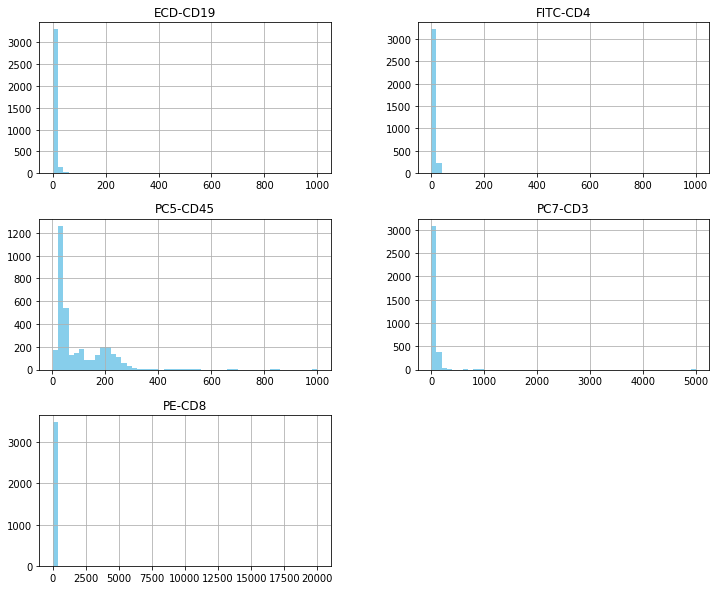

In [22]:
## a quick look at the distribution of each feature column in our dataset with histogram
combined_exp.hist(bins=50, figsize=(12,10), color='skyblue')
plt.show()

# 3. Data Clean-up: Missing Values and Outliers

### 3a :  Dealing with Missing Values
There are values in <i> PE-CD8</i> and <i>PC5-CD45</i> columns.    
We handle missing data points with two Apporaches:  
- drop an entire row with a missing value or 
- <b> impute </b> the missing values with the mean or mode or median.

The dataframe will be copied to demonstrate both ways. Whichever route you take depends on how much missing data is present. Always keep in mind that you want to retain as much data as possble.

In [12]:
#copy the original data 
df = combined_exp.copy()
#before dropping rows with missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


In [13]:
##after dropping rows with empty values 
df.dropna(axis=0, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3497 non-null float64
PE-CD8      3497 non-null float64
ECD-CD19    3497 non-null float64
PC5-CD45    3497 non-null float64
PC7-CD3     3497 non-null float64
dtypes: float64(5)
memory usage: 163.9 KB


In [14]:
###impute missing values with the mean oe each column
df = combined_exp.copy()
##before imputing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


In [15]:
###impute missing values with the mean oe each column
m1 = df['PE-CD8'].mean()
df['PE-CD8'].fillna(m1, inplace=True) ##fill missing values with the mean
m2 = df['PC5-CD45'].mean()
df['PC5-CD45'].fillna(m2,inplace=True)##fill missing values with the mean
##after filling empty rows with mean
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3500 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3500 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


#### Now that the demo is over, I choose to drop the rows with missing values in the original data since they aren't that many 

In [16]:
combined_exp.dropna(axis=0, inplace=True)
combined_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3497 non-null float64
PE-CD8      3497 non-null float64
ECD-CD19    3497 non-null float64
PC5-CD45    3497 non-null float64
PC7-CD3     3497 non-null float64
dtypes: float64(5)
memory usage: 163.9 KB


### 3b. Finding Outliers and Doing Summary Statistics

We can obtain quick summary statistics of each column (feature) using the <b> .describe() </b> method to gain insight about the distrubition of the data. This shows mean, max, min, count (non-null values), percentiles

In [23]:
combined_exp.describe()

,FITC-CD4,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,8.259508,14.034130,6.331480,98.286916,31.857014
std,40.406166,339.698436,27.940002,92.890647,100.211465
min,0.000000,0.000000,0.000000,2.225878,0.000000
25%,1.301767,2.037050,1.598360,33.935579,5.271917
50%,2.004625,3.058436,2.522471,49.835253,8.206375
75%,3.675464,9.310731,5.290990,165.527502,19.714374
max,999.970436,20000.000000,999.970436,999.970436,5000.000000


<b>Observations and Inferences for Each Column</b>:    
<li>If mean is larger than the median this indicates that data is skewed to large values (right)</li>
<li> If the 1<sup>st</sup> quartile (25th) is closer to median than the 2<sup>nd</sup> adds support that distribution  is skewed to large values </li>
<li> if  the standard deviation is much smaller than the range (max-min) this indicates long tail distribution </li>

What other inferences about the distribution of the data can you make?

<b> Let's Visualise the Distribution for the PE-CD8 marker</b>

In [24]:
font_title = {'family': 'sans serif', 'color':  'black', 'weight': 'bold', 'size': 14}
font_ax =  {'family': 'sans serif', 'color':  'brown', 'weight': 'normal', 'size': 14}

##Write to function to easily generate summary stats plots for any column in our dataframe
def plotstats(df,col):
    #plot two charts, one over the other
    fig,ax = plt.subplots(2,1, figsize=(12,8))
    plt.title("Distribution of {} Fluoresence Intensities".format(col), fontdict=font_title)
    #Boxplot
    df.dropna().boxplot(col,ax=ax[0], vert=False, return_type='dict') #excludes null values in col
    #plot a histogram 
    temp = df[col].as_matrix()  #converts df into numpy matrix array
    ax[1].hist(temp, bins=80, alpha=0.7)
    plt.ylabel('Number of Blood Cells')
    plt.xlabel(col)
    return [col]

['PE-CD8']

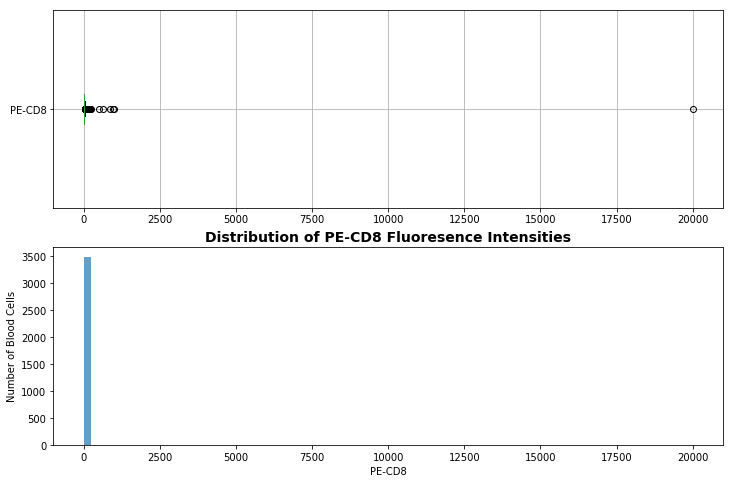

In [25]:
## call our function 
plotstats(combined_exp, 'PE-CD8')

<b>Note</b> The box plot and histogram are on the same scale. However the boxplot gives us a better picture of outliers. Please note that outliers are not always due to noise so they may be meaningful. However I have deliberately modified the data with outliers (the maximum intensitiy should not above 1000 units)

In [26]:
##Remove outlier values by dropping rows in PE-CD8 and PC5-CD45 with values beyond 10000
combined_exp = combined_exp[combined_exp['PE-CD8']<10000]
combined_exp = combined_exp[combined_exp['PC7-CD3']<5000]
#check
combined_exp.describe()

,FITC-CD4,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,8.259575,8.316992,6.333020,98.274781,30.442148
std,40.417432,33.271905,27.947881,92.909349,54.604878
min,0.000000,0.000000,0.000000,2.225878,0.000000
25%,1.301767,2.036573,1.598360,33.920320,5.271440
50%,2.004625,3.052714,2.522471,49.804735,8.202561
75%,3.674987,9.258279,5.285268,165.588537,19.690532
max,999.970436,999.970436,999.970436,999.970436,999.970436


['PE-CD8']

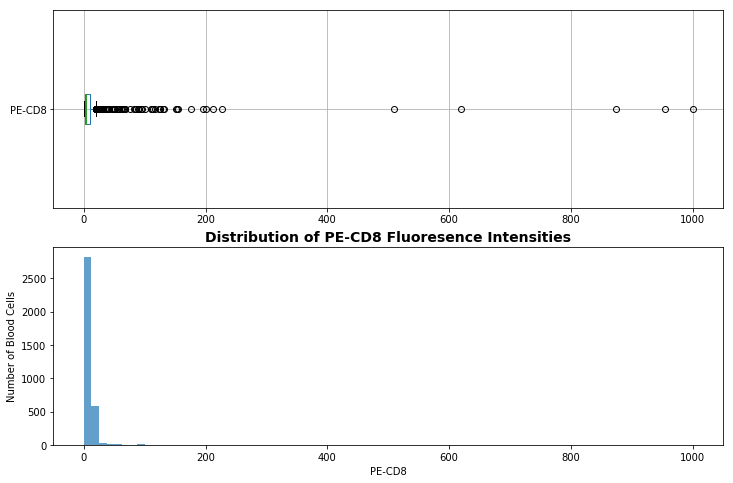

In [27]:
##plot the distribution of PC-CD8 after
plotstats(combined_exp, 'PE-CD8')

#### Play around with the function to explore the distribution of other feature columns

# 4. Data Transformation 

<b> Data Transformation </b> is often a necessary step before performing any modelling on your data, especially if you do not know the distribution of your data  or you want rescale your data to a Gaussian (normal) or before doing dimensionality reduction like PCA.   
Two popular types of data transformation is <i> normalisation </i>  and <i> standardisation</i>. In data science and machine learning these  methods are sometimes referred to as <b> <i> feature scaling </i> </b>. In both cases, the goal is get the values of each feature variable on the same scale or in a restricted range. 

- <b> Normalization aka Min-Max Scaling </b>: rescales the column feature values between 0 and 1. The highest value will = 1 and the lowest value =0.
- <b> Standardization aka Z-normalization </b> : rescales the feature values to have a mean of  and standard deviation of 1 so that they are now standard normal distibuted.

You can easily transform your data with python's sklearn library.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
df_stand = StandardScaler().fit_transform(combined_exp)  ##Z-score normalization
df_minmax = MinMaxScaler().fit_transform(combined_exp)  ## Min-max scaling

In [33]:
##compare means of the rescaled data to the original data
orig_means = combined_exp.describe().loc['mean'].values

stand_means = []
for i in range(5): #5 features
    stand_means.append(df_stand[:,i].mean())

minmax_means = []
for i in range(5): #5 features
    minmax_means.append(df_minmax[:,i].mean())

print('Unscaled Means: ', orig_means)
print('Z-score standardization means: ', np.asarray(stand_means))  #means will be very small close to zero
print(' Min-Max rescaled means: ', np.asarray(minmax_means))

Unscaled Means:  [ 8.25957457  8.31699237  6.33302018 98.27478146 30.44214792]
Z-score standardization means:  [ 4.47265814e-17 -1.82972378e-17 -9.14861892e-18 -2.84623700e-17
 -6.09907928e-17]
 Min-Max rescaled means:  [0.00825982 0.00831724 0.00633321 0.09626603 0.03044305]


# 4. Data/Dimensionality Reduction  

Data reduction aims to reduce the complexity of high dimensional data. It is important for:
    - Compressing data so it saves storage and processing time
    - Pattern Discover or Clustering data
    - Outlier detection 
You can think of each feature as a dimension or axis on graph. We can comfortably read a 2-dimensional graph. 3-dimensional plots are sometimes tolerable but are to be avoided if possible, but anything higher than 4-dimensions is illegible for the human visual system. High dimensionality is commonly generated in scientific experiments. For example, this demo flow cytometry data has 5 cell-markers or features (5-dimensions) but most experiments can have 10 20 0r 30 markers per cell.  

## PCA

<b> Principal Componenent Analysis </b> is to probably the most widely used dimensionality reduction, for visualing high-dimensional data in the life sciences.     
Formally, PCA reduces high dimensional feature space to a lower dimension feature subsapce by choosing new axes, called <b> principal components </b> , that retains as much the variation that was present in the orignal data. Josh Starmer's <a href = 'https://www.youtube.com/watch?v=_UVHneBUBW0'> PCA explanation</a> is a must watch for a deeper understanding PCA.   

<b> Practical Issues of PCA </b>

1. PCA is sensitive to very large values. if a feature is too large then it will dominate and be a principal component, thus we <b>MUST</b>  do feature scaling or normalisation.  
2. Assumes subspace is linear.

In [34]:
## import PCA library
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) #instantiate PCA with the number of dimensions or principal componenets

In [36]:
##Step.1 Z-score normalize the data
data_normed = StandardScaler().fit_transform(combined_exp)

In [58]:
## Step 2. perform PCA on the normalized data 
data_reduce=pca.fit_transform(data_normed)

#tell us how much of the information is retained after reduction, higher is better
var_exp = pca.explained_variance_ratio_ 

## coverting pandas dataframe makes it easier to plot
data_reduce = pd.DataFrame(data_reduce, columns=['PC1', 'PC2']) 


In [38]:
# Check how much variation is retained from the original higher dimensional data 
print('Cumulative variance explained by PC1 and PC2: {} %'.format(round(np.sum(var_exp)*100,2))) 

Cumulative variance explained by PC1 and PC2: 89.41 %


#### What happens to the variance explained (which we want to maximise) if we did not normalize our data? Try running PCA on the unnormalized data and find out the impact

In [39]:
print(data_normed.shape) #note that we have 5 feature columns aka 5-dimensions
print(data_reduce.shape) #now the data is reduced to 2-dimensions

(3495, 5)
(3495, 2)


In [59]:
data_reduce.head() #each principal componenent is an axis

,PC1,PC2
0,1.104903,-1.640013
1,1.018392,-1.046503
2,0.032542,-0.182891
3,1.239840,-1.366764
4,-0.668707,0.338521


<b> PCA </b> is a popular way of visualizing and finding hidden patterns in data. 

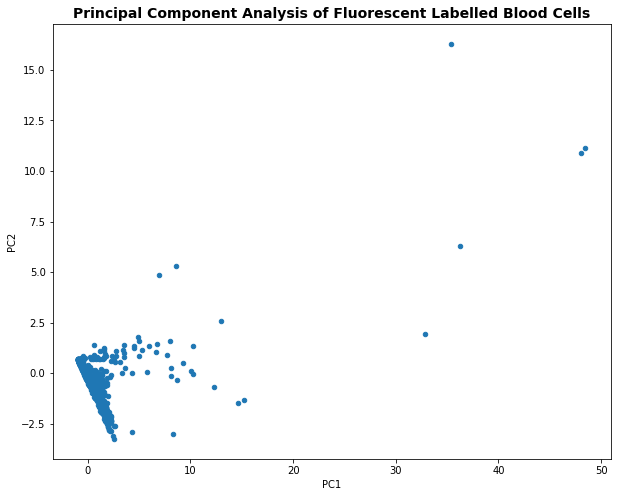

In [43]:
data_reduce.plot.scatter('PC1', 'PC2', figsize=(10,8))
plt.title('Principal Component Analysis of Fluorescent Labelled Blood Cells', fontsize=14, fontweight='bold')
plt.show()

Our graph looks squashed because we have a few 'outliers' beyond at PC1= 10 that is obscuring the rest of the data, let's remove that and see how the graph looks. Again those outliers could be a meaningful data point such as a rare blood cell, so don't be quick to throw away 'outliers'. However, temporarily ommitting extreme can give us a better visual of out data. I am going to replot the PCA data without extreme values to demonstrate this point.

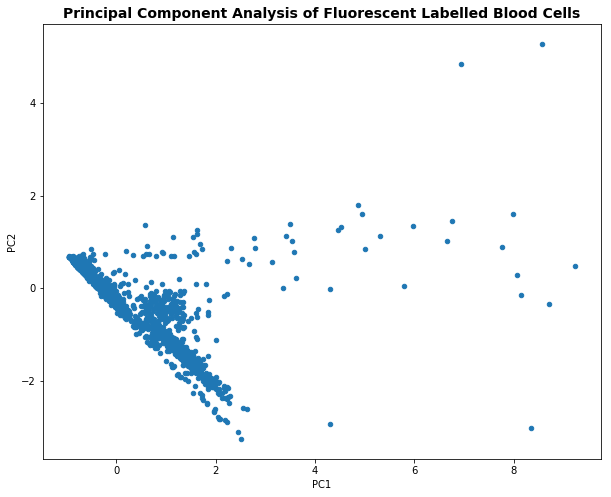

In [44]:
## copy the PCA data, filtering out extreme values 
no_outlier = data_reduce[data_reduce['PC1']<10]
## Plot to see the effect 
no_outlier.plot.scatter('PC1', 'PC2', figsize=(10,8))
plt.title('Principal Component Analysis of Fluorescent Labelled Blood Cells', fontsize=14, fontweight='bold')
plt.show()

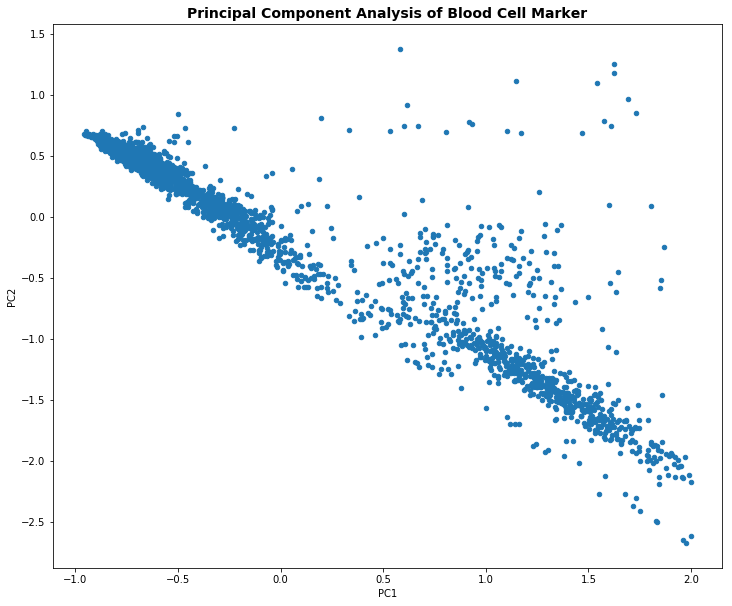

In [45]:
## copy the PCA data, filtering out extreme values 
no_outlier = data_reduce[data_reduce['PC1']<2]
## Plot to see the effect 
no_outlier.plot.scatter('PC1', 'PC2', figsize=(12,10))
plt.title('Principal Component Analysis of Blood Cell Marker', fontsize=14, fontweight='bold')
plt.show()

## Last Lap:  K-means Clustering

Finally, The visual utility of PCA lies with the ability to find hidden patterns in our data by reducing the data to only relevant features. If we have the labels or categories for our data we can color our PCA plot by those labels. However, if we do not have labels for our instances PCA can be coupled with clustering algorithms such as <b>K-means</b> which makes for powerful data discovery.

<b> K-means</b> is an unsupervised clustering algorithm that is widely used to assign data points to groups based on their similarity. In this case, we have unlabelled since we do not have information on the actual types of cells. K-means can be used with PCA to uncover hidden patterns in data.  
3. Run Kmeans clustering algorithm to determine cell types   
<b> Let's use kmeans to see if we can get distinct clusters of blood cells. We do not how many types or clusters of blood cells there are so I will show you a popular to determine the optimal number of clusters   </b>

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

The mandatory parameters for Kmeans is the n_clusters (we do not know) and of course the data (which can be the PCA transformed data or the original data). I will use kmeans on the orginal normalized data.

<i> Aside: Thanks to <i>Sebastien Raschka's Python Mchine Learning book for teaching me this techniqe</i></i> !!! 

### Elbow  Method + Silhouette Analysis to find optimal k clusters
- How do we know the number of clusters to pass to KMeans?  We use an iterative method to quantify the quality of each cluster sizes, based on two approaches: 
       
       1) measuring level of similarity of members in their assigned clusters (sum-squared error aka distortion) 
       2) measuring the level of dissimilarity between clusters.   
        
The Aim is to find the optimal number of cluster k that minimises the within-cluster error (sum of squres error) and maximises the between-cluster differences.  


- <b> Elbow method</b> is to identify the value of k where there is a sharp decrease in distortion.
- <b>Silhouette analysis</b> is a graphical way of measuring how tightly grouped the clusters are. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters


In [47]:
### Pass in sequential number of clusters and evaluate which number gives the best cohesiveness 
distortions= []
sil_scores = [] #average silhoutte score
for i in range(2,10,1): #start with 2 clusters, increase by 1 upto a maximum of 10 clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(data_normed)
    distortions.append(km.inertia_) #store the cohesive quality of each cluster size
    sil_scores.append(silhouette_score(data_normed, km.labels_, metric='euclidean'))


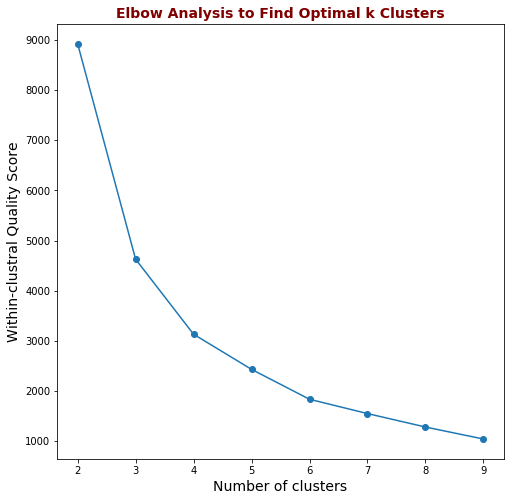

In [49]:
## Plot to determine the 'Elbow'
plt.figure(figsize=(8,8))
plt.plot(range(2,10,1), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Within-clustral Quality Score', fontsize=14)
plt.title('Elbow Analysis to Find Optimal k Clusters', fontsize=14, fontweight='bold', color='maroon')
plt.show()

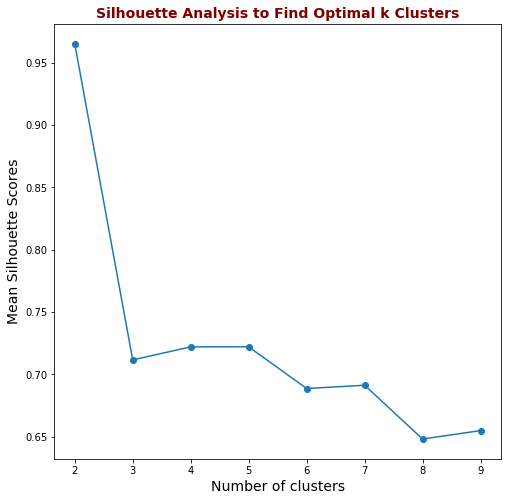

In [51]:
## Visualise the 'Silhouette '
plt.figure(figsize=(8,8))
plt.plot(range(2,10,1), sil_scores, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Mean Silhouette Scores', fontsize=14)
plt.title('Silhouette Analysis to Find Optimal k Clusters', fontsize=14, fontweight='bold', color='maroon')
plt.show()

Recall that The best silihouette value is 1 and the worst value is -1. Values near 0 indicate overlapping (impure) clusters.

#### My approach is to sometimes choose the number of cluster which is a trade-off between the two methods. In this case, k=5 seems like a good candidate that satisfies both evaluation method. 

### Now that we have determined the optimal number of clusters, Let's run KMeans on the original data and then color our PCA plot according to each cluster to visualise the distinct blood cell types

In [52]:
#fit Kmeans to the normalized high dimensional data
kmeans = KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=100, random_state=0).fit(data_normed)  
#extract cluster assigned to each instances (cells)
clusters = kmeans.labels_ 
#append to our PCA data frame so we can color the pca by cluster type
data_reduce['Cluster'] = clusters 

In [53]:
print(clusters.shape)
print(data_reduce.shape)
#Note that PCA only reduces the number of dimensions (columns) but not the number of samples!!

(3495,)
(3495, 3)


In [57]:
data_reduce.head()

,PC1,PC2,Cluster
0,1.104903,-1.640013,2
1,1.018392,-1.046503,2
2,0.032542,-0.182891,0
3,1.239840,-1.366764,2
4,-0.668707,0.338521,0


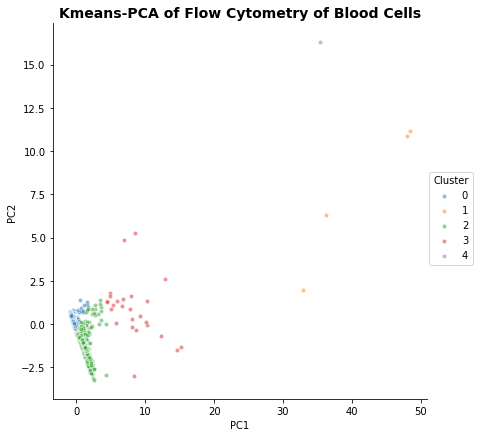

In [54]:
### Visualise! 
seaborn.pairplot( x_vars= 'PC1',y_vars='PC2', data=data_reduce, hue='Cluster', size=6,
                plot_kws=dict(alpha=0.5, s=20)) #s is size of markers, alpha controls transparency

plt.title('Kmeans-PCA of Flow Cytometry of Blood Cells', fontsize=14, fontweight='bold')
plt.show()

### Yes! Kmeans-PCA was able to resolve the distinct blood cell types based on the variation in the cell-specific fluorescent antibody measurements

####  Let's visualise without extreme values to get a close-up view of the squashed clusters

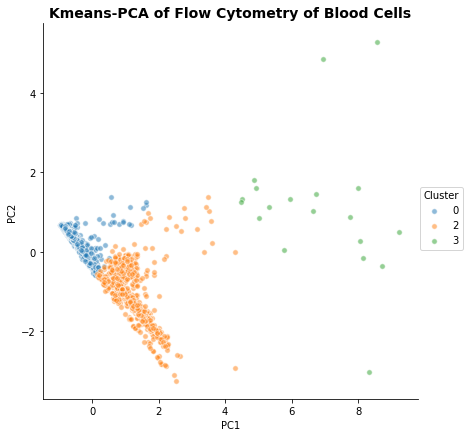

In [56]:
## copy the PCA data, filtering out extreme values 
no_outlier = data_reduce[data_reduce['PC1']<10] 

seaborn.pairplot( x_vars= 'PC1',y_vars='PC2', data=no_outlier, hue='Cluster', size=6,
                plot_kws=dict(alpha=0.5, s=30)) #s is size of markers, alpha controls transparency

plt.title('Kmeans-PCA of Flow Cytometry of Blood Cells', fontsize=14, fontweight='bold')
plt.show()

### Observations 

We clearly see why it isn't a good idea to throw out extreme values, when select samples with a PC1 below 10 we discarded 2 entire clusters of blood cells!. However, sometimes it a good idea to temporarily ommit extreme values that are obscuring other data points. 

## Final Thoughts
If you were able to cover the entire material in this notebook, believe it or not you have covered at least a month's worth of data science and programming material! Much this code can be reused and tweaked to fit any similar once it is in a table/dataframe format. In my experience,  the workflow will be pretty much the same:
    1. Load data into a dataframe and Explore your data
    2. Clean-up your data - remove or impute missing values
    3. Integrate data if necessary
    4. Transform or Scale your data
    5. Perform whatever analysis or modelling you intend!


### Thank you following through this tutorial and I hope it was helpful. 